In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
df = pd.read_csv('weather_revised.csv')
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')
df.set_index('date', inplace=True)

In [10]:
df.head()

,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
date,,,,,,,,
2042-01-01,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
2042-01-02,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2042-01-03,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
2042-01-04,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
2042-01-05,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7


In [11]:
df.dtypes


maxtp(Maximum Air Temperature - degrees C)     float64
mintp(Minimum Air Temperature - degrees C)     float64
gmin(Grass Minimum Temperature - degrees C)     object
rain(Precipitation Amount - mm)                float64
cbl (Mean CBL Pressure-hpa)                    float64
wdsp(Mean Wind Speed - knot)                   float64
pe(Potential Evapotranspiration - mm)          float64
evap(Evaporation -mm)                           object
dtype: object

In [12]:
df.head()

,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
date,,,,,,,,
2042-01-01,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
2042-01-02,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2042-01-03,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
2042-01-04,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
2042-01-05,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7


In [13]:
df.isna().sum()


maxtp(Maximum Air Temperature - degrees C)     0
mintp(Minimum Air Temperature - degrees C)     0
gmin(Grass Minimum Temperature - degrees C)    0
rain(Precipitation Amount - mm)                0
cbl (Mean CBL Pressure-hpa)                    0
wdsp(Mean Wind Speed - knot)                   0
pe(Potential Evapotranspiration - mm)          0
evap(Evaporation -mm)                          0
dtype: int64

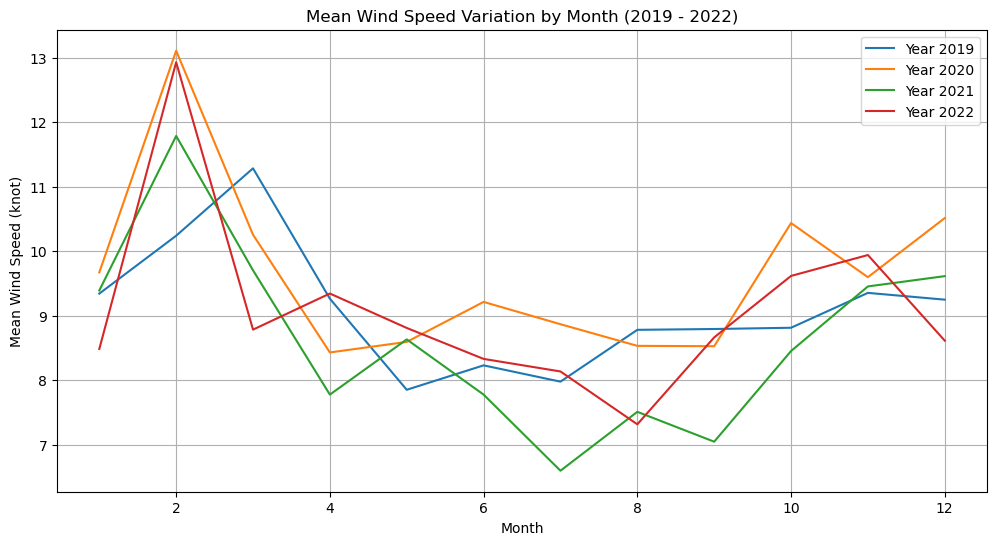

In [14]:
import matplotlib.pyplot as plt

# Filter data for the specified years (2019 to 2022)
filtered_data = df[(df.index.year >= 2019) & (df.index.year <= 2022)]

# Group data by year and month, calculating the mean wind speed
monthly_wdsp = filtered_data.groupby([filtered_data.index.year, filtered_data.index.month])['wdsp(Mean Wind Speed - knot)'].mean()

# Reshape data for plotting
monthly_wdsp = monthly_wdsp.unstack()

# Plotting time series for each year
plt.figure(figsize=(12, 6))
for year in monthly_wdsp.index:
    plt.plot(monthly_wdsp.columns, monthly_wdsp.loc[year], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Mean Wind Speed (knot)')
plt.title('Mean Wind Speed Variation by Month (2019 - 2022)')
plt.legend()
plt.grid(True)
plt.show()




In [15]:
columns_to_convert = ['gmin(Grass Minimum Temperature - degrees C)', 'evap(Evaporation -mm)']

# Convert object columns to float
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [16]:
df.describe()


,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
count,29889.000000,29889.000000,29884.000000,29889.000000,29889.000000,29889.000000,29889.000000,29887.000000
mean,13.064900,6.157051,4.315145,2.074720,1003.520208,10.198658,1.506986,2.161662
std,4.908828,4.383088,5.061045,4.396479,11.723154,4.609213,1.001506,1.463069
min,-4.700000,-12.200000,-15.000000,0.000000,949.600000,0.000000,0.000000,0.000000
25%,9.400000,2.900000,0.500000,0.000000,996.200000,6.800000,0.700000,0.900000
50%,13.000000,6.300000,4.500000,0.200000,1004.600000,9.600000,1.300000,1.900000
75%,16.900000,9.600000,8.100000,2.200000,1011.700000,13.000000,2.200000,3.200000
max,29.100000,18.400000,17.900000,92.600000,1037.400000,35.500000,5.700000,8.100000


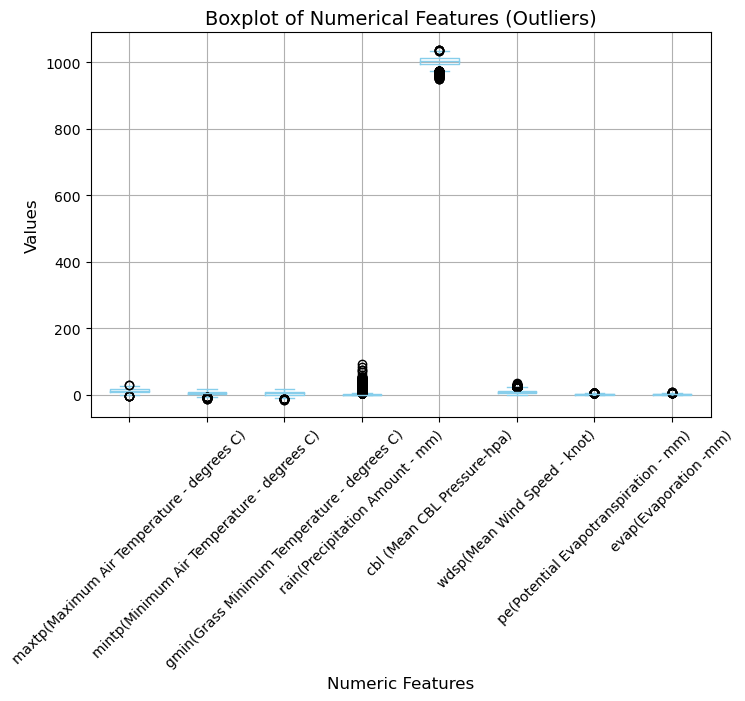

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualize outliers using boxplots for each numerical feature with altered size and color
plt.figure(figsize=(8, 5))  # Adjusting size
boxplot = df[numeric_cols].boxplot(color='skyblue')  # Changing plot color
plt.title('Boxplot of Numerical Features (Outliers)', fontsize=14)  # Adding title with larger font
plt.xticks(rotation=45)
plt.xlabel('Numeric Features', fontsize=12)  # Adjusting x-axis label font size
plt.ylabel('Values', fontsize=12)  # Adjusting y-axis label font size
plt.grid(True)  # Adding gridlines for better readability
plt.show()

# Detect outliers based on Interquartile Range (IQR) using descriptive statistics
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for potential outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [18]:
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers in the column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Displaying the number of outliers in each column
    print(f'Column: {column}, Number of Outliers: {len(outliers)}')


Column: maxtp(Maximum Air Temperature - degrees C), Number of Outliers: 8
Column: mintp(Minimum Air Temperature - degrees C), Number of Outliers: 31
Column: gmin(Grass Minimum Temperature - degrees C), Number of Outliers: 25
Column: rain(Precipitation Amount - mm), Number of Outliers: 3497
Column: cbl (Mean CBL Pressure-hpa), Number of Outliers: 336
Column: wdsp(Mean Wind Speed - knot), Number of Outliers: 375
Column: pe(Potential Evapotranspiration - mm), Number of Outliers: 98
Column: evap(Evaporation -mm), Number of Outliers: 21


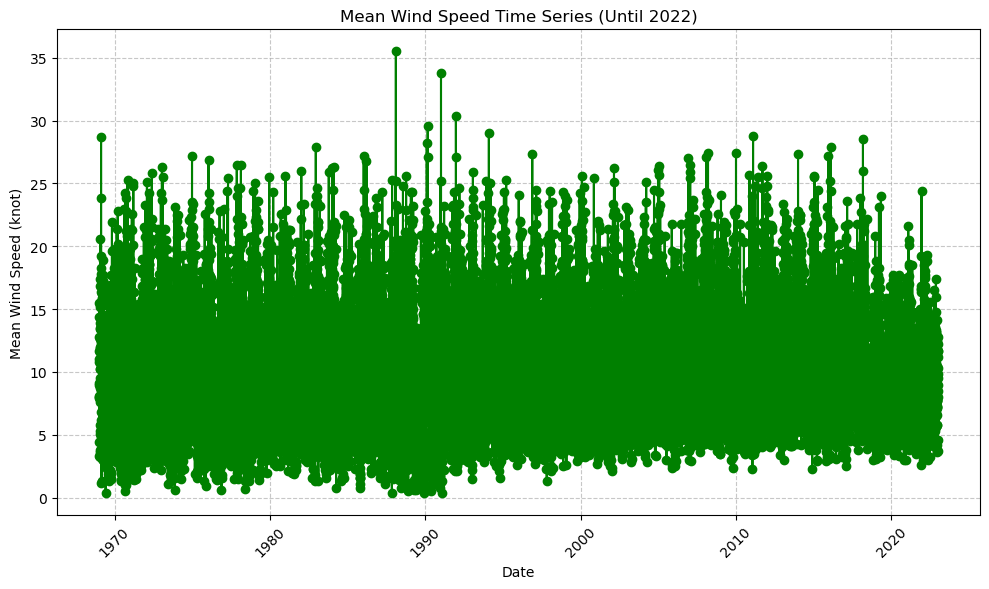

In [19]:
# Filter data for dates until 2022
filtered_data = df[df.index.year <= 2022]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['wdsp(Mean Wind Speed - knot)'], linestyle='-', marker='o', color='green')
plt.title('Mean Wind Speed Time Series (Until 2022)')
plt.xlabel('Date')
plt.ylabel('Mean Wind Speed (knot)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


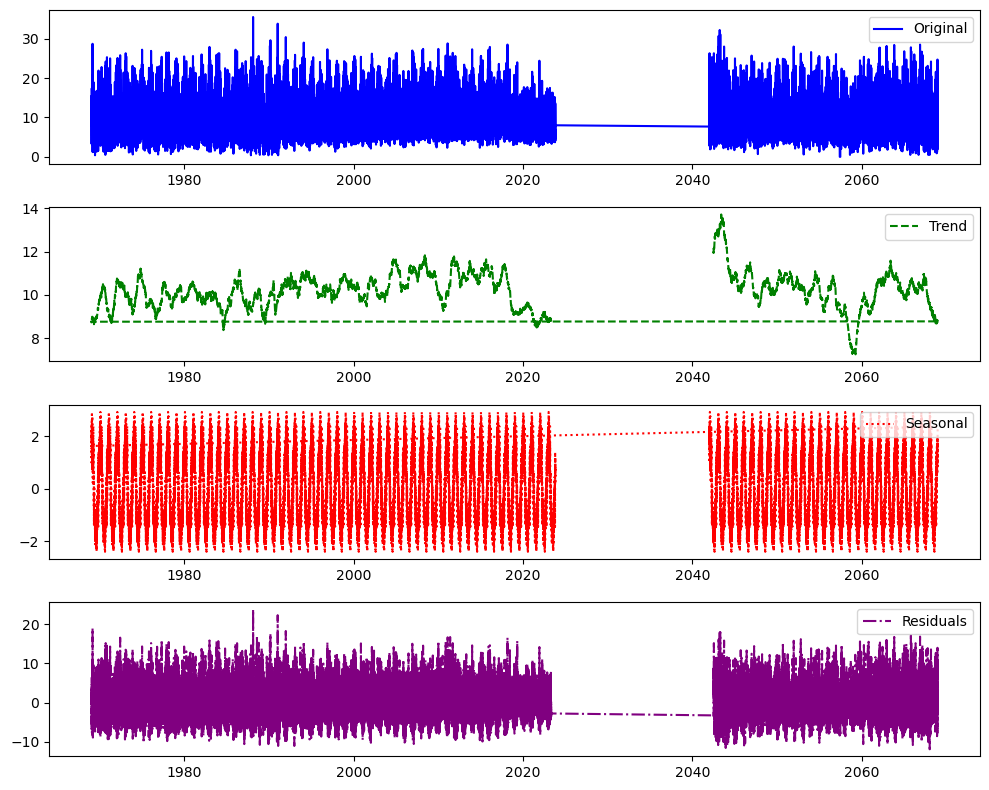

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the 'wdsp' variable
decomposition = seasonal_decompose(df['wdsp(Mean Wind Speed - knot)'], model='additive', period=365)

# Plot the decomposed components using a different visual style
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.observed, '-', label='Original', color='blue')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, '--', label='Trend', color='green')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, ':', label='Seasonal', color='red')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, '-.', label='Residuals', color='purple')
plt.legend()

plt.tight_layout()
plt.show()


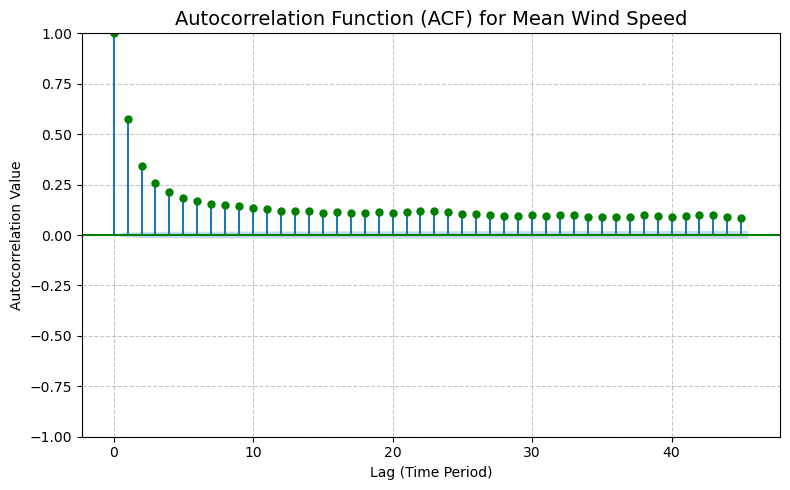

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Calculate Autocorrelation Function (ACF) for 'wdsp' variable
acf_fig, acf_ax = plt.subplots(figsize=(8, 5))
plot_acf(df['wdsp(Mean Wind Speed - knot)'], ax=acf_ax, color='green')
acf_ax.set_xlabel('Lag (Time Period)')
acf_ax.set_ylabel('Autocorrelation Value')
acf_ax.set_title('Autocorrelation Function (ACF) for Mean Wind Speed', fontsize=14)
acf_ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
df.head()

,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
date,,,,,,,,
2042-01-01,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
2042-01-02,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2042-01-03,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
2042-01-04,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
2042-01-05,3.5,-0.8,0.0,0.6,1013.4,13.0,0.6,0.7


Model I

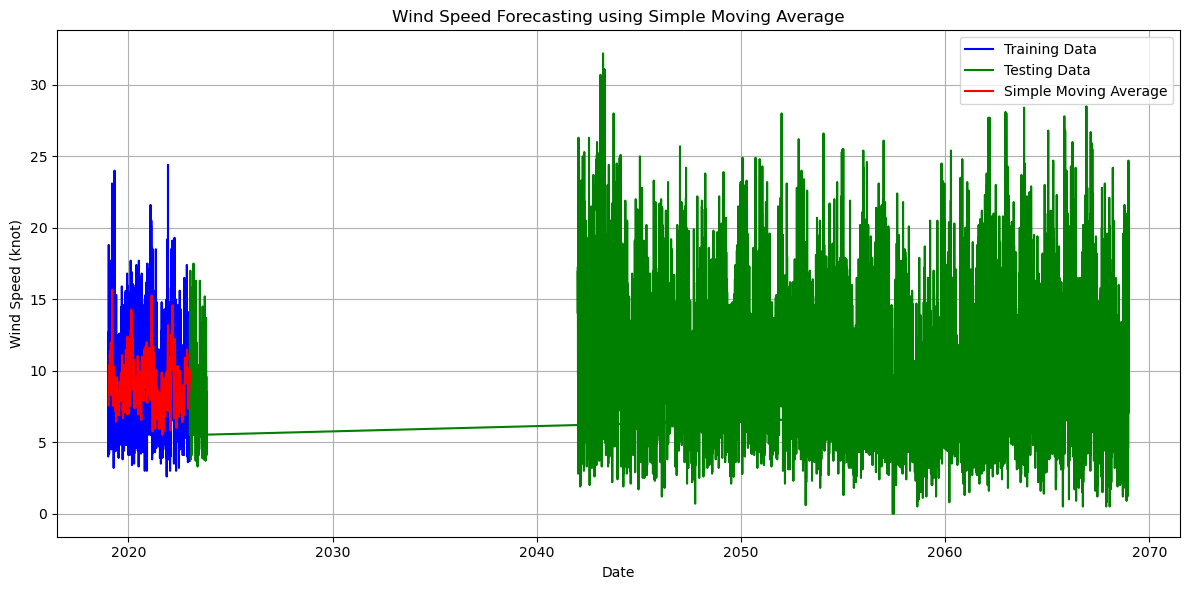

In [23]:
# Split data into training (2019-2022) and testing (2023) sets
train_data = df['2019-01-01':'2022-12-31']['wdsp(Mean Wind Speed - knot)']
test_data = df['2023-01-01':]['wdsp(Mean Wind Speed - knot)']

# Simple Moving Average
window_size = 12  # You can adjust this window size
rolling_mean = train_data.rolling(window=window_size).mean()

# Plotting the results in a different way
plt.figure(figsize=(12, 6))

# Plotting training data
plt.plot(train_data.index, train_data, label='Training Data', color='blue')

# Plotting testing data
plt.plot(test_data.index, test_data, label='Testing Data', color='green')

# Plotting Simple Moving Average
plt.plot(rolling_mean.index, rolling_mean, label='Simple Moving Average', color='red')

plt.xlabel('Date')
plt.ylabel('Wind Speed (knot)')
plt.legend()
plt.title('Wind Speed Forecasting using Simple Moving Average')
plt.grid(True)
plt.tight_layout()
plt.show()


Model II

C:\Users\BAJWA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error (MSE): 25.79288915629814
Root Mean Squared Error (RMSE): 5.078670018449529


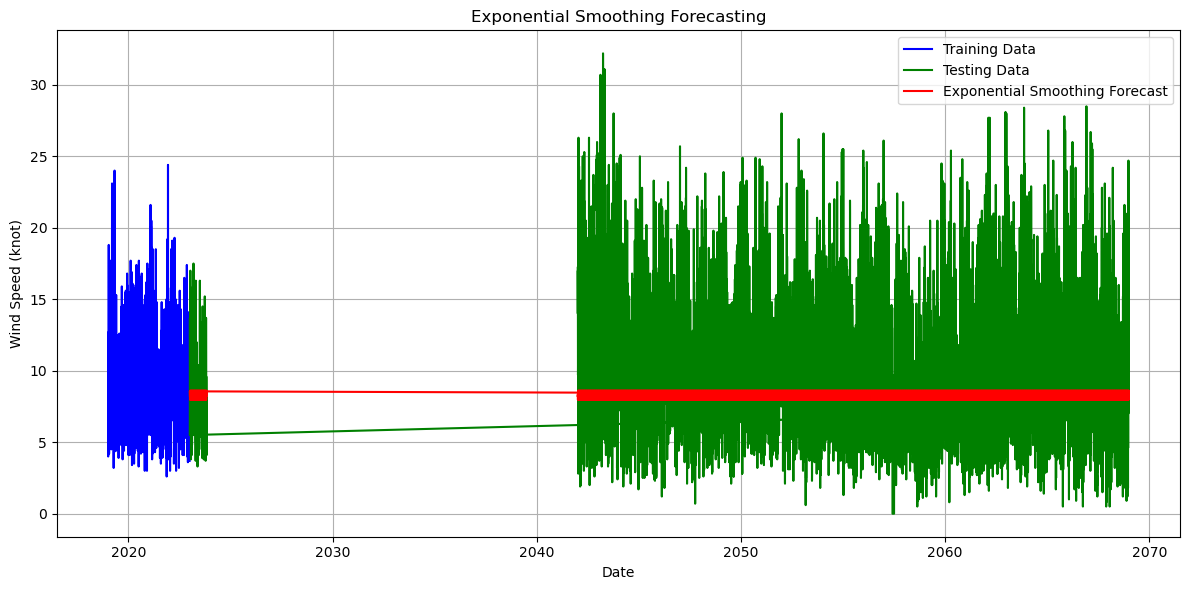

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Exponential Smoothing
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(len(test_data))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

# Display MSE and RMSE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting with different visualization style
plt.figure(figsize=(12, 6))

# Training Data
plt.plot(train_data.index, train_data, label='Training Data', color='blue')

# Testing Data
plt.plot(test_data.index, test_data, label='Testing Data', color='green')

# Forecasted Data
plt.plot(test_data.index, forecast, label='Exponential Smoothing Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Wind Speed (knot)')
plt.legend()
plt.title('Exponential Smoothing Forecasting')
plt.grid(True)
plt.tight_layout()
plt.show()


Model III

C:\Users\BAJWA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\BAJWA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error (MSE): 34.12615513018623
Root Mean Squared Error (RMSE): 5.841759591953971


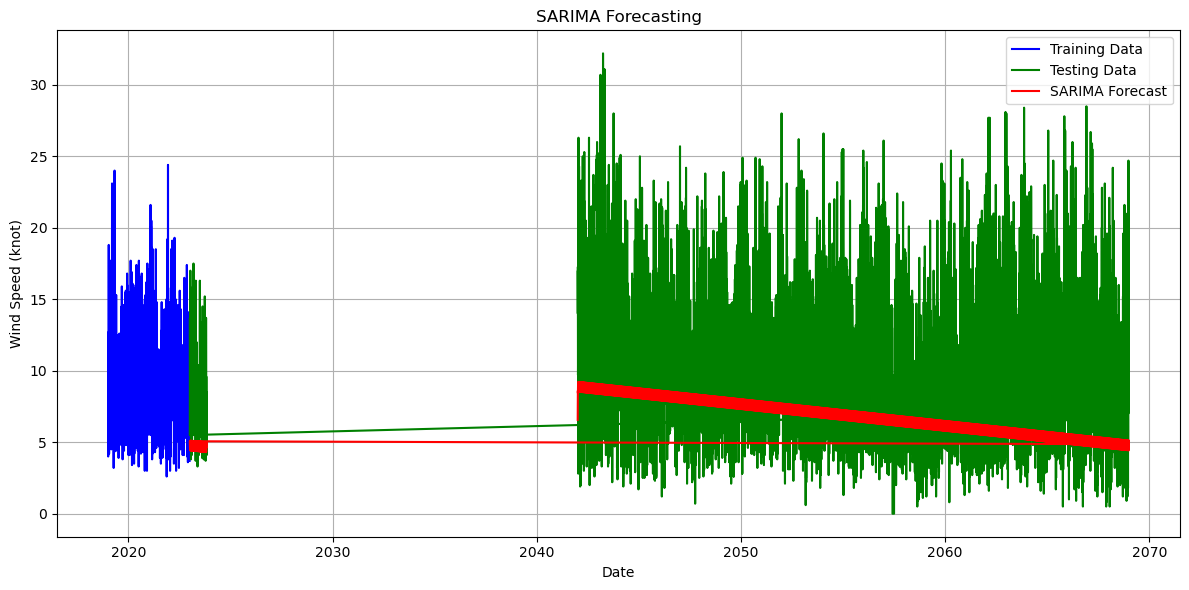

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# SARIMA Model
order = (1, 1, 1)  # You can adjust the order parameters
seasonal_order = (1, 1, 1, 12)  # You can adjust the seasonal_order parameters

model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=True)

# Forecast
forecast = model_fit.forecast(len(test_data))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

# Display MSE and RMSE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting with different visualization style
plt.figure(figsize=(12, 6))

# Training Data
plt.plot(train_data.index, train_data, label='Training Data', color='blue')

# Testing Data
plt.plot(test_data.index, test_data, label='Testing Data', color='green')

# Forecasted Data
plt.plot(test_data.index, forecast, label='SARIMA Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Wind Speed (knot)')
plt.legend()
plt.title('SARIMA Forecasting')
plt.grid(True)
plt.tight_layout()
plt.show()



In [26]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Prepare data for Prophet
prophet_df = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
prophet_df.reset_index(drop=True, inplace=True)

# Fit Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a dataframe for future dates
future = pd.DataFrame({'ds': test_data.index})
future.reset_index(drop=True, inplace=True)

# Make forecasts
forecast = model.predict(future)

# Plotting with a different visualization style
plt.figure(figsize=(12, 6))

# Training Data
plt.plot(prophet_df['ds'], prophet_df['y'], label='Training Data', color='black')

# Forecasted Data
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Wind Speed (knot)')
plt.legend()
plt.title('Prophet Forecasting')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate performance metrics
mse = mean_squared_error(test_data, forecast['yhat'])
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


ModuleNotFoundError: No module named 'prophet'

Mean Model Mean Squared Error (MSE): 23.42176100336939
Mean Model Root Mean Squared Error (RMSE): 4.8396033931893


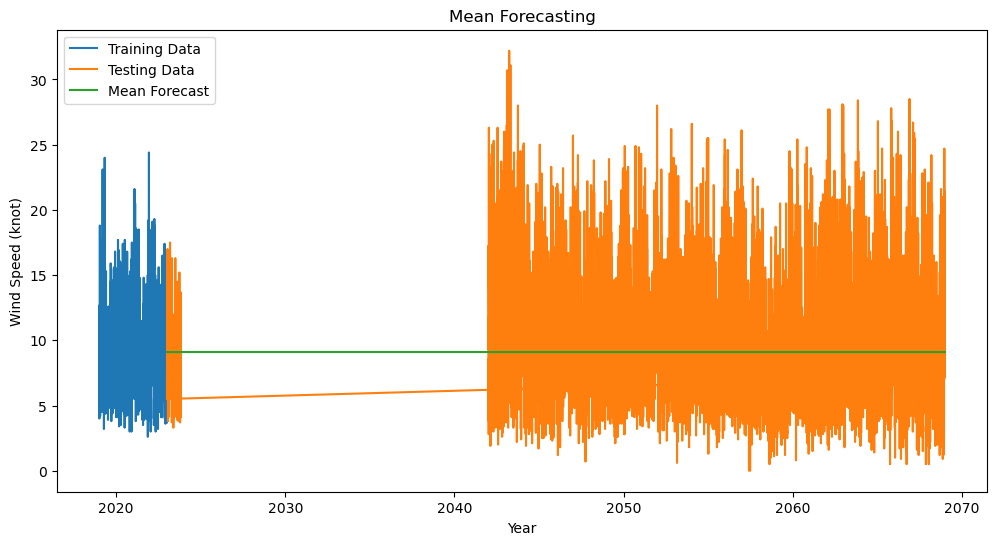

In [27]:
# Mean Forecasting Model
def mean_forecast(train_data, test_data):
    # Calculate the mean of the training data
    mean_value = train_data.mean()

    # Repeat the mean value for the length of the test data
    forecast = pd.Series([mean_value] * len(test_data), index=test_data.index)

    return forecast

# Apply Mean Forecasting
mean_forecast_series = mean_forecast(train_data, test_data)

# Calculate Mean Squared Error (MSE)
mean_mse = mean_squared_error(test_data, mean_forecast_series)
mean_rmse = np.sqrt(mean_mse)

# Print MSE and RMSE
print(f'Mean Model Mean Squared Error (MSE): {mean_mse}')
print(f'Mean Model Root Mean Squared Error (RMSE): {mean_rmse}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(mean_forecast_series, label='Mean Forecast')
plt.xlabel('Year')
plt.ylabel('Wind Speed (knot)')
plt.legend()
plt.title('Mean Forecasting')
plt.show()
